In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /Library/Frameworks/Python.framework/Versions/3.12/bin/python3.12 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df = pd.read_csv("train.csv")

In [7]:
df.shape

(891, 12)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# there are missing values in 3 columns Age, Cabin and Embarked.
# too many missing values in cabin column we will drop it 
df.drop(columns=['Cabin'],inplace=True)

In [17]:
# inputing mean values for mean for age 
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [15]:
#imputing values for Embarked.
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [18]:
#filling missing values with S
df['Embarked']=df['Embarked'].fillna('S')

In [19]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [20]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
# changing the sibsp and parch to categories from int.
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [22]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

##  Changing the datatypes for these columns  

In [23]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


# Univariate analysis

In [25]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

out of 891 people 62% died 


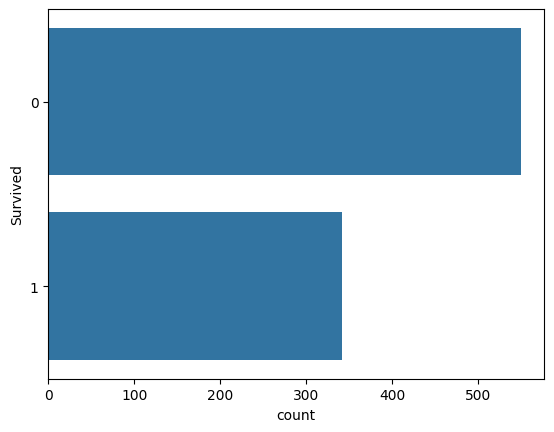

In [26]:
#analysis on how many people survived
sns.countplot(df['Survived'])
death_percent=round((df['Survived'].value_counts().values[0]/891)*100)
print("out of 891 people {}% died ".format(death_percent))

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


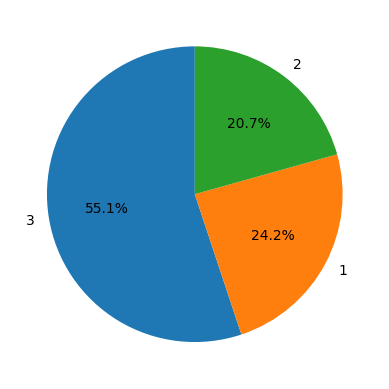

percentage of people
Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


<Axes: xlabel='count', ylabel='Pclass'>

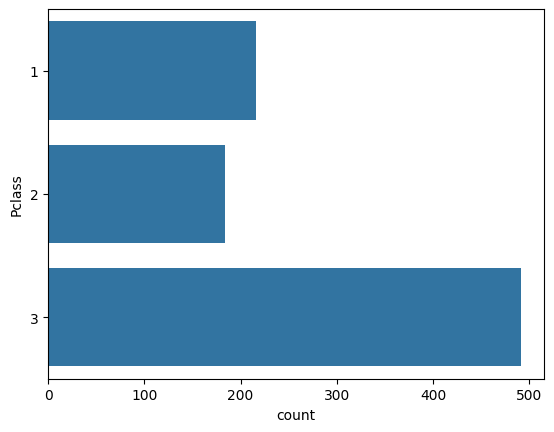

In [37]:
#Pclass 
pclass_counts = df['Pclass'].value_counts()
print(pclass_counts)
#percentage
plt.pie(pclass_counts, labels=pclass_counts.index, autopct='%1.1f%%', startangle=90)
plt.show()
print("percentage of people")
print(df['Pclass'].value_counts()/891*100)
sns.countplot(df["Pclass"])

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:383: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(n - .5, -.5, auto=None)


<Axes: xlabel='count', ylabel='Sex'>

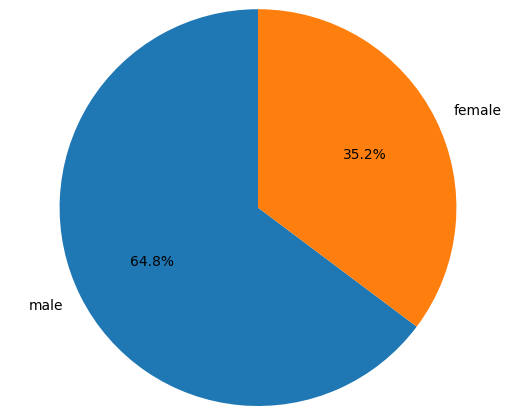

In [42]:
print(df["Sex"].value_counts()/891*100)
sex_count = df["Sex"].value_counts()
plt.pie(sex_count, labels=sex_count.index, autopct='%1.1f%%', startangle=90)
sns.countplot(df["Sex"])

<Axes: xlabel='count', ylabel='Sex'>

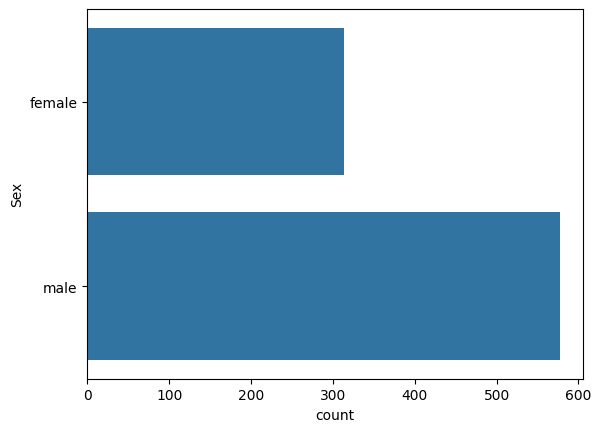

In [43]:
sns.countplot(df["Sex"])

SibSp
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: count, dtype: float64


<Axes: ylabel='count'>

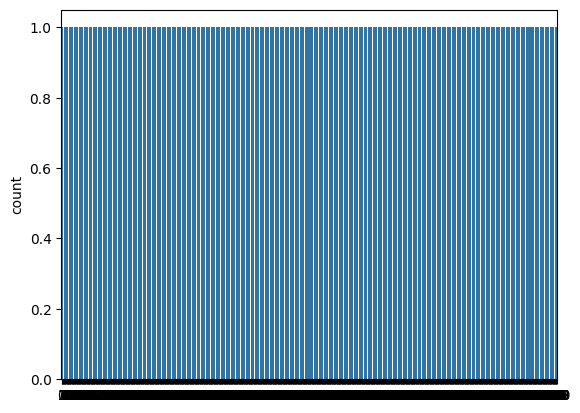

In [53]:
print(df['SibSp'].value_counts()/891*100)
sns.countplot(df['SibSp'])

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


<Axes: ylabel='count'>

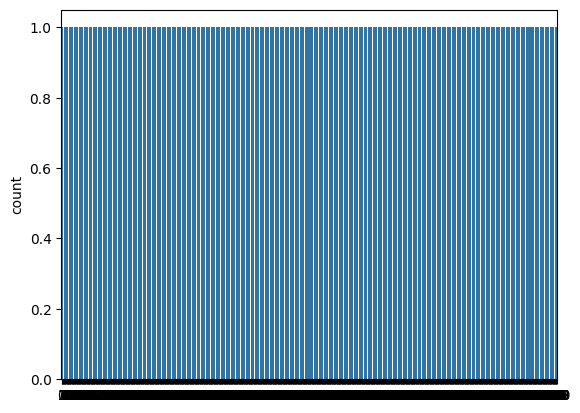

In [52]:
print(df["Parch"].value_counts()/891*100)
sns.countplot(df["Parch"])

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


<Axes: xlabel='count', ylabel='Embarked'>

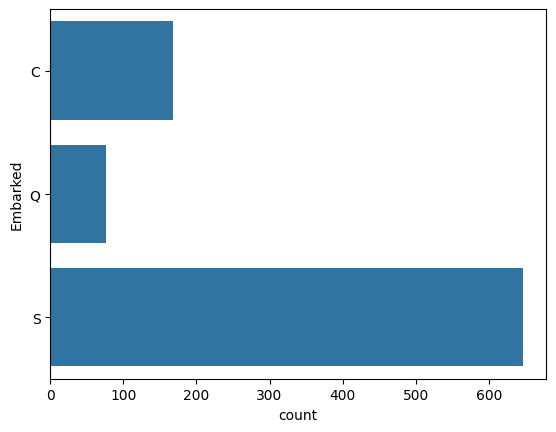

In [55]:
print(df['Embarked'].value_counts()/891*100)
sns.countplot(df['Embarked'])

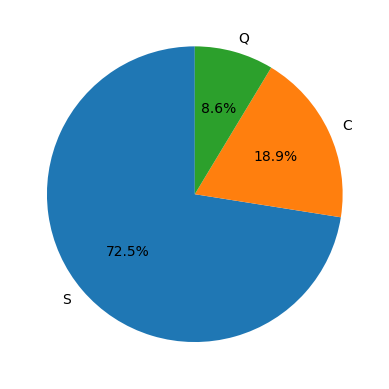

In [58]:
embarked_count = df['Embarked'].value_counts()
plt.pie(embarked_count, labels= embarked_count.index, autopct='%1.1f%%', startangle=90)
plt.show()

/var/folders/nb/9n0bsb9j6cz_nvfw2ng5hpc00000gn/T/ipykernel_2048/4016527396.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


0.45956263424701577
0.9865867453652877


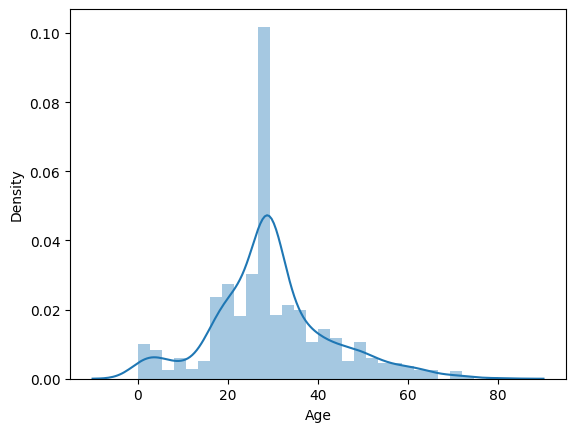

In [61]:
#Age column
sns.distplot(df["Age"])
print(df["Age"].skew())
print(df["Age"].kurt())

<Axes: ylabel='Age'>

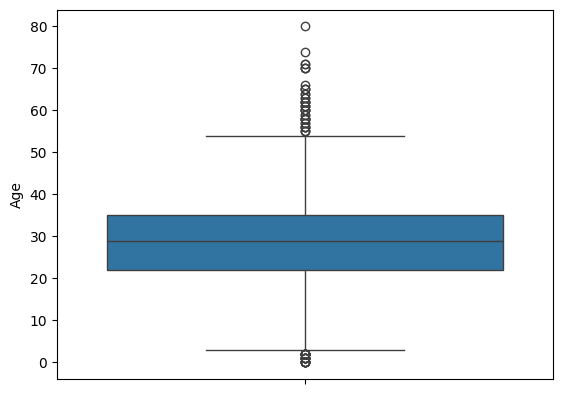

In [62]:
sns.boxplot(df["Age"])

In [67]:
# how many were children
print("Children between 0 to 15 are : ", df[(df["Age"]>=0) & (df["Age"]<=15)].shape[0])
print("And the children out of the 83 that lived were : ", df[(df["Age"]>=0) & (df["Age"]<=15) & (df["Survived"] ==0)].shape[0])

Children between 0 to 15 are :  83
And the children out of the 83 that lived were :  34


/var/folders/nb/9n0bsb9j6cz_nvfw2ng5hpc00000gn/T/ipykernel_2048/3412121224.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Fare"])


4.787316519674893
33.39814088089868


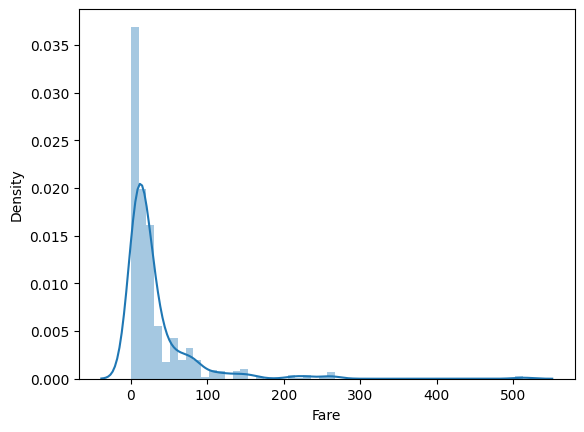

In [71]:
#Fare Column
sns.distplot(df["Fare"])
print(df["Fare"].skew())
print(df["Fare"].kurt())

<Axes: ylabel='Fare'>

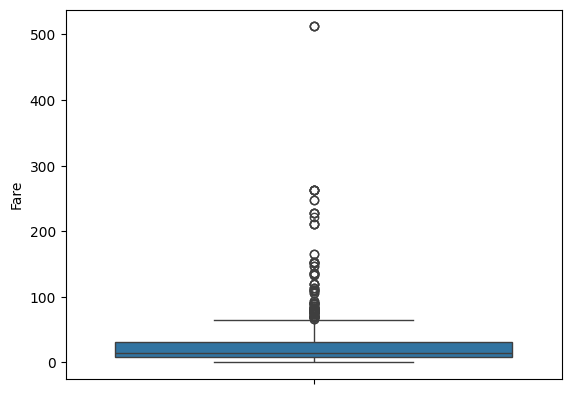

In [72]:
sns.boxplot(df["Fare"])

## Multivariate Analysis

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


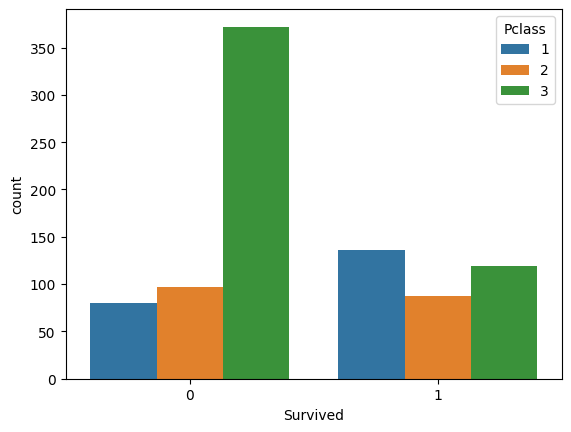

In [78]:
#survival with Pclass
sns.countplot(x="Survived", hue="Pclass", data=df)
pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round(r/r.sum()*100, 1), axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


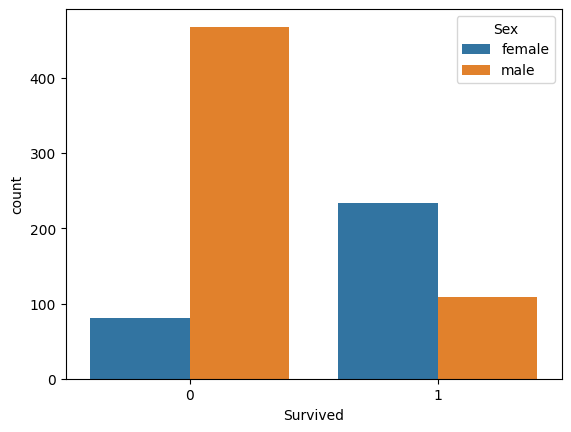

In [79]:
#survival with Sex
sns.countplot(x="Survived", hue="Sex", data=df)
pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round(r/r.sum()*100, 1), axis=1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


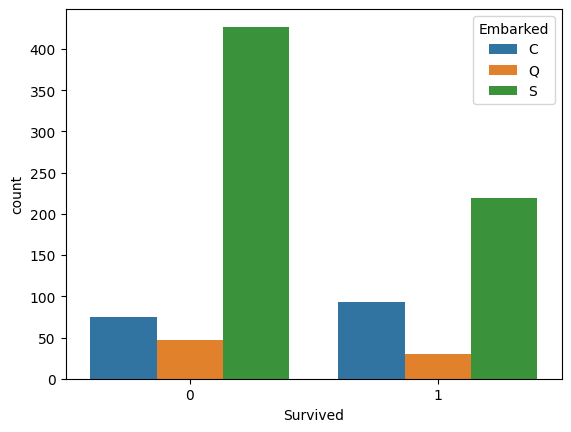

In [80]:
#survived with Embarked 
sns.countplot(x="Survived", hue="Embarked", data=df)
pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round(r/r.sum()*100, 1), axis=1)

/var/folders/nb/9n0bsb9j6cz_nvfw2ng5hpc00000gn/T/ipykernel_2048/2201623903.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["Survived"]==0]["Age"])
/var/folders/nb/9n0bsb9j6cz_nvfw2ng5hpc00000gn/T/ipykernel_2048/2201623903.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["Survi

<Axes: xlabel='Age', ylabel='Density'>

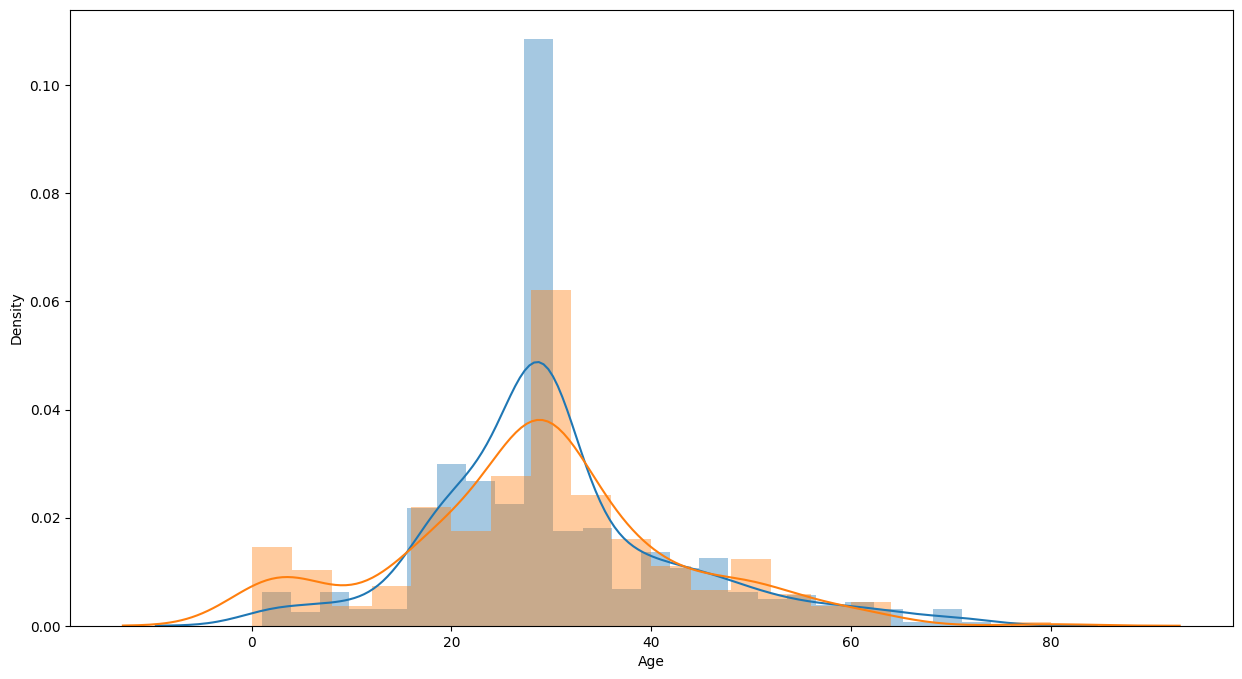

In [81]:
#Survived with age 
#blue is the probability of people dying while yellow is of surviving.
plt.figure(figsize=(15,8))
sns.distplot(df[df["Survived"]==0]["Age"])
sns.distplot(df[df["Survived"]==1]["Age"])

/var/folders/nb/9n0bsb9j6cz_nvfw2ng5hpc00000gn/T/ipykernel_2048/2695186581.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["Survived"]==0]["Fare"])
/var/folders/nb/9n0bsb9j6cz_nvfw2ng5hpc00000gn/T/ipykernel_2048/2695186581.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["Surv

<Axes: xlabel='Fare', ylabel='Density'>

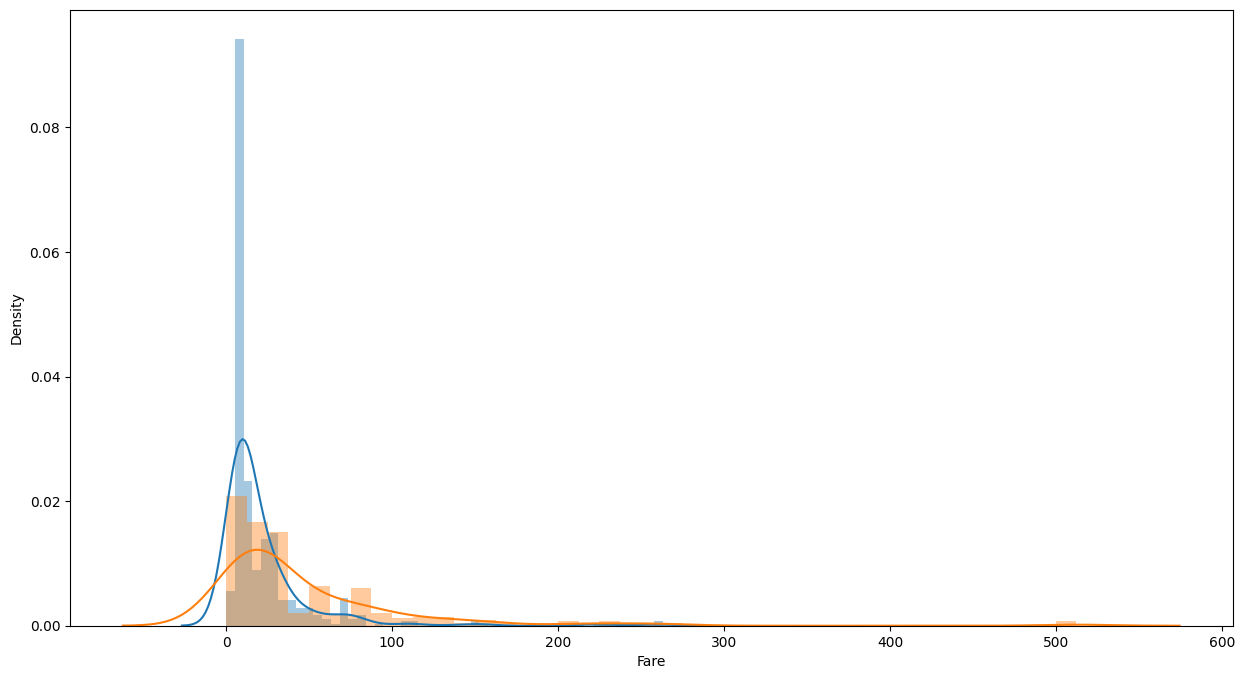

In [82]:
#Survived with Fare
plt.figure(figsize=(15,8))
sns.distplot(df[df["Survived"]==0]["Fare"])
sns.distplot(df[df["Survived"]==1]["Fare"])

A pairplot in Seaborn is a way to quickly visualize relationships between multiple numeric columns in your dataset.

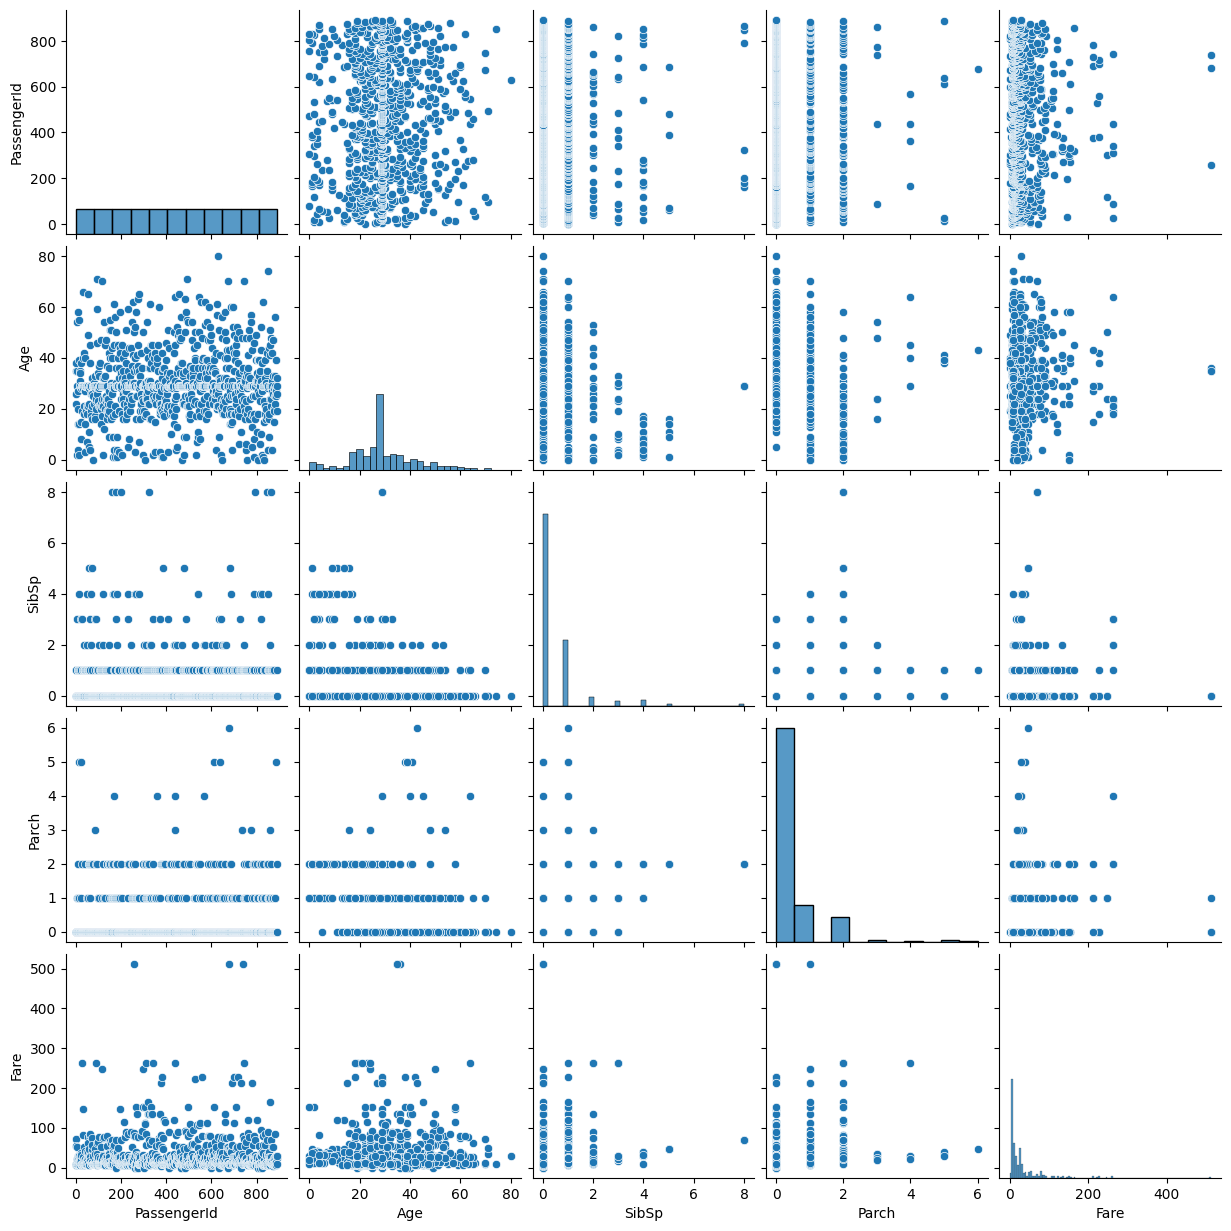

In [84]:
sns.pairplot(data=df)

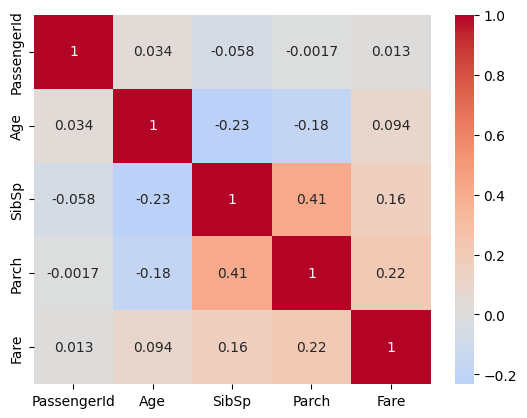

In [86]:
corr = df.select_dtypes(include=['number']).corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.show()

# Feature engineering 

In [88]:
#we will create a new column named family size by adding Sibsp  (Sibling spouse) and Parch (Parent child)

df['family_size'] = df['SibSp']+df['Parch']

In [89]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
344,345,0,2,"Fox, Mr. Stanley Hubert",male,36,0,0,229236,13.0000,S,0
222,223,0,3,"Green, Mr. George Henry",male,51,0,0,21440,8.0500,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,C,1
667,668,0,3,"Rommetvedt, Mr. Knud Paust",male,29,0,0,312993,7.7750,S,0
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0,2,1,2666,19.2583,C,3


In [90]:
#now categorising the family size into family type according to the number of members 
def family_type(num):
    if num==0:
        return "Alone"
    if num>0 and num<=4:
        return "Medium"
    else:
        return "Large"

In [91]:
df["Family_type"]= df['family_size'].apply(family_type)

In [92]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,Family_type
281,282,0,3,"Olsson, Mr. Nils Johan Goransson",male,28,0,0,347464,7.8542,S,0,Alone
648,649,0,3,"Willey, Mr. Edward",male,29,0,0,S.O./P.P. 751,7.5500,S,0,Alone
621,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42,1,0,11753,52.5542,S,1,Medium
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4,0,2,315153,22.0250,S,2,Medium
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49,1,0,PC 17572,76.7292,C,1,Medium


In [94]:
#dropping sibsp, parch, family_size
df.drop(columns=['SibSp', 'Parch', 'family_size'])

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22,A/5 21171,7.2500,S,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,71.2833,C,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,7.9250,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,113803,53.1000,S,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35,373450,8.0500,S,Alone
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,211536,13.0000,S,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,112053,30.0000,S,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,W./C. 6607,23.4500,S,Medium
889,890,1,1,"Behr, Mr. Karl Howell",male,26,111369,30.0000,C,Alone


In [95]:
pd.crosstab(df['Family_type'], df['Survived']).apply(lambda r: round(r/r.sum()*100, 1), axis=1)

Survived,0,1
Family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


# Detecting outliers 
Outliers are data points that are very different (too high or too low) compared to the rest of the data.
Why Detect Outliers?  
Outliers can skew mean, correlation, and models (like regression).
Sometimes they’re important insights (fraud detection, rare diseases).
### Numerical outliers 
using IQR (Interquartile Range) Method  
Based on percentiles (Q1 = 25%, Q3 = 75%).  
Formula:  
Outlier if:   
Value < Q1 - 1.5×IQR  
Value > Q3 + 1.5×IQR   

In [98]:
#handling outliers in age using normal 
df=df[df['Age']<(df['Age'].mean() + 3 * df['Age'].std())]
df.shape

(884, 13)

In [103]:
#handling fare outliers using IQR logic 
Q1=np.percentile(df['Fare'],25)
Q3=np.percentile(df['Fare'],75)

outlier_low= Q1 - 1.5 * (Q3-Q1)
outlier_high= Q3 + 1.5 * (Q3-Q1)

df=df[(df['Fare']>outlier_low) & (df['Fare']<outlier_high)]

In [105]:
#one hot encoding
#converting categorical columns into numerical columns
#so if we have sex as male and female we convert it into 0 and 1 
#columns to be transformed are Pclass, Embarked, Sex and Family_type
pd.get_dummies(data=df, columns=['Pclass','Embarked','Sex','Family_type'],drop_first=True)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,family_size,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,Family_type_Large,Family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,1,False,True,False,True,True,False,True
2,3,1,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,0,False,True,False,True,False,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,1,False,False,False,True,False,False,True
4,5,0,"Allen, Mr. William Henry",35,0,0,373450,8.0500,0,False,True,False,True,True,False,False
5,6,0,"Moran, Mr. James",29,0,0,330877,8.4583,0,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27,0,0,211536,13.0000,0,True,False,False,True,True,False,False
887,888,1,"Graham, Miss. Margaret Edith",19,0,0,112053,30.0000,0,False,False,False,True,False,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29,1,2,W./C. 6607,23.4500,3,False,True,False,True,False,False,True
889,890,1,"Behr, Mr. Karl Howell",26,0,0,111369,30.0000,0,False,False,False,False,True,False,False
